In [17]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
color_list = ['salmon', 'mediumturquoise', 'limegreen', 'cornflowerblue', 'fuchsia', 'khaki']

import copy as cp
import pickle
import pandas as pd
from ipywidgets import IntProgress
from IPython.display import display
from datetime import date
import os

#import pylustrator
#pylustrator.start()


import RandomPEPS as rpeps
import StructureMatrixGenerator as smg
import trivialSimpleUpdate as tsu
import DoubleEdgeFactorGraphs as defg
import SimpleUpdate as su
import bmpslib as bmps
print(date.today())

2020-07-30


In [18]:
files = []
directory = 'data'
for filename in os.listdir(directory):
    if filename[0:4] == 'data':
        print(filename)
        files.append(filename)

data4x4_AFH_ground_state_PEPS_uniform_random_couplings_19Jul20.npy
data4x4_random_PEPS.npy
data4x4_AFH_ground_state_PEPS.npy
data10x10_random_PEPS.npy
data4x4_random_PEPS_2020-07-27.npy
data10x10_AFH_ground_state_PEPS.npy
data4x4_AFH_PEPS_with_random_couplings_2020-07-28.npy
data4x4_AFH_PEPS_with_random_couplings_2020-07-30.npy
data10x10_random_PEPS_2020-07-27.npy
data10x10_AFH_ground_state_PEPS_uniform_random_couplings_19Jul20.npy
data10x10_AFH_PEPS_with_random_couplings_2020-07-30.npy


In [45]:
my_file = files[10][4:]
print(my_file)
file = 'data/data' + my_file
params = 'data/parameters' + my_file
data = np.load(file, allow_pickle=True)
parameters = np.load(params, allow_pickle=True)

10x10_AFH_PEPS_with_random_couplings_2020-07-30.npy


In [46]:
print(parameters)

[list(['ATD', 'BP', 'tSU']) list(['N x M', [10, 10]])
 list(['bond_dimensions', [2, 3, 4]]) list(['bc', 'open']) list(['d', 2])
 list(['dw', 1e-06]) list(['BP t_max', 200]) list(['BP epsilon', 1e-08])
 list(['BP dumping', 0.0]) list(['tSU t_max', 200])
 list(['num of experiments', 20]) list(['BPU_iterations', 200])
 list(['ITE time steps', [0.1, 0.05, 0.01, 0.005, 0.001]])]


In [47]:
# unpack parameters
N, M = parameters[1][1][0], parameters[1][1][1]
bond_dimensions = parameters[2][1]
num_experiments = parameters[10][1]


# unpack data
ATD_D = data[0]
T_BP_D = data[1]
T_SU_D = data[2]

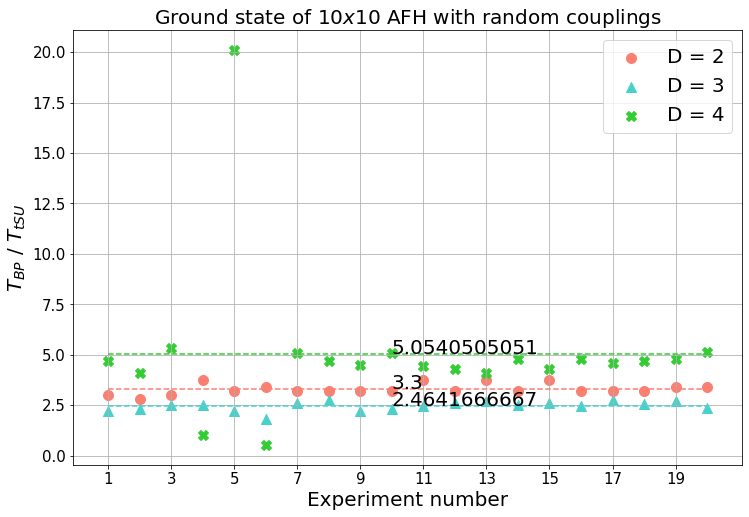

In [48]:
#name = 'Ground state of ' + '$' + str(N) + ' x ' + str(M) + '$'  + ' AFH'
name = 'Ground state of ' + '$' + str(N) + ' x ' + str(M) + '$'  + ' AFH with random couplings'
#name = '$' + str(N) + ' x ' + str(M) + '$'  + ' AFH PEPS ground state'
#name = '$' + str(N) + ' x ' + str(M) + '$'  + ' random PEPS'
file_name = name + '_' + str(date.today())
plt.figure(figsize=(12, 8))
fonts = 20
my_markers = ['o', '^', 'X']
for i, D in enumerate(bond_dimensions):
    my_label = 'D = ' + str(D) 
    plt.scatter(range(1, num_experiments + 1),
                np.asarray(T_BP_D[i]) / np.asarray(T_SU_D[i]),
                marker=my_markers[i],
                color=mcd.CSS4_COLORS[color_list[i]], 
                s=100,
                label=my_label)
    
    plt.plot(range(1, num_experiments + 1),
             np.mean(np.asarray(T_BP_D[i]) / np.asarray(T_SU_D[i])) * np.ones((num_experiments, 1)),
             '--',
             color=mcd.CSS4_COLORS[color_list[i]])
    plt.text(10,
             np.mean(np.asarray(T_BP_D[i]) / np.asarray(T_SU_D[i])),
             str(np.round(np.mean(np.asarray(T_BP_D[i]) / np.asarray(T_SU_D[i])), 10)), 
             fontsize=20)
plt.title(name, fontsize=fonts)
plt.xlabel('Experiment number', fontsize=fonts)
plt.ylabel('$T_{BP}$ / $T_{tSU}$', fontsize=fonts)
plt.xticks(list(range(1, num_experiments + 1, 2)), fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=fonts)
plt.grid()
#plt.ylim([0, 10])
plt.savefig('images/tSU-BP_ratio_with_mean_vals/' + file_name + '_with_mean_vals' + '.svg', format="svg")
plt.savefig('images/tSU-BP_ratio_with_mean_vals/' + file_name + '_with_mean_vals' + '.pdf')
plt.show()

In [23]:
ATD_D

array([[ 1.68710095,  1.29025656,  3.78051922,  1.33290893,  4.96892689,
         2.78922532,  1.7461612 ,  1.63580181,  3.18157234,  2.23494436],
       [ 1.51142023,  2.7705039 ,  2.57508279,  1.13864396,  1.08163201,
         3.92151752,  0.90088407,  1.97134304,  2.84392095,  1.10089934],
       [ 1.97102719,  1.09959083,  2.53573826,  2.19901889,  4.29587717,
        28.75262487,  1.18364427,  5.05954463,  1.58490391,  1.25779285]])

In [24]:
T_BP_D

array([[14., 13., 15., 13., 15., 15., 12., 13., 15., 15.],
       [19., 17., 16., 19., 17., 21., 16., 19., 18., 18.],
       [38., 41., 31., 41., 40., 50., 37., 43., 41., 39.]])

In [25]:
T_SU_D

array([[ 4.,  3.,  4.,  3.,  4.,  4.,  3.,  3.,  4.,  4.],
       [ 6.,  6.,  9.,  7.,  7.,  7.,  5.,  8.,  7.,  7.],
       [ 9.,  9., 15.,  7., 16.,  7.,  6.,  8.,  6., 13.]])